In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("../data/Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 7.9 KB


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


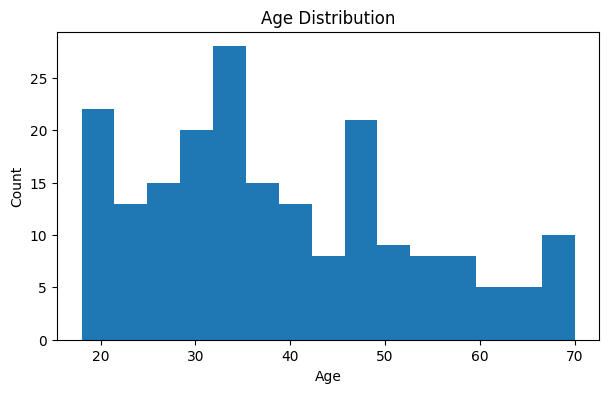

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(df["Age"], bins=15)

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

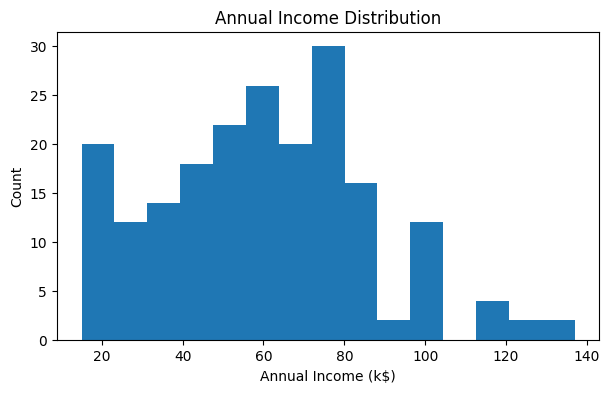

In [7]:
plt.figure(figsize=(7,4))
plt.hist(df["Annual Income (k$)"], bins=15)

plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")

plt.show()

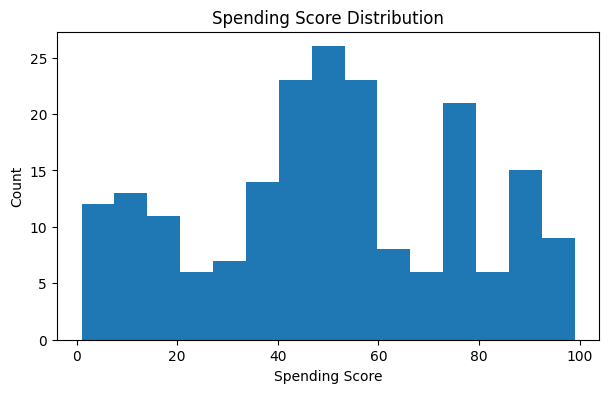

In [8]:
plt.figure(figsize=(7,4))
plt.hist(df["Spending Score (1-100)"], bins=15)

plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")

plt.show()

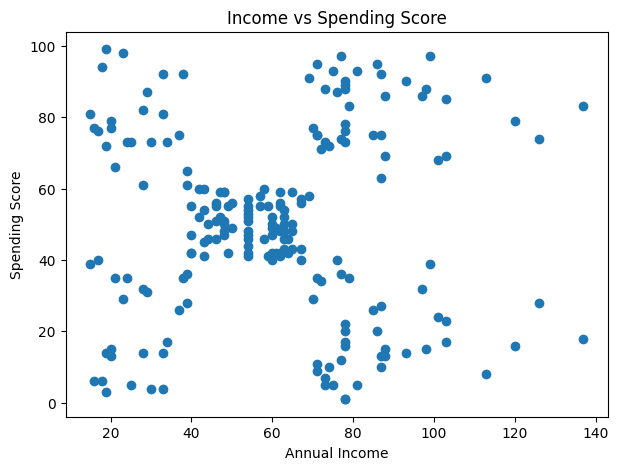

In [9]:
plt.figure(figsize=(7,5))

plt.scatter(df["Annual Income (k$)"],
            df["Spending Score (1-100)"])

plt.title("Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.show()

In [10]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

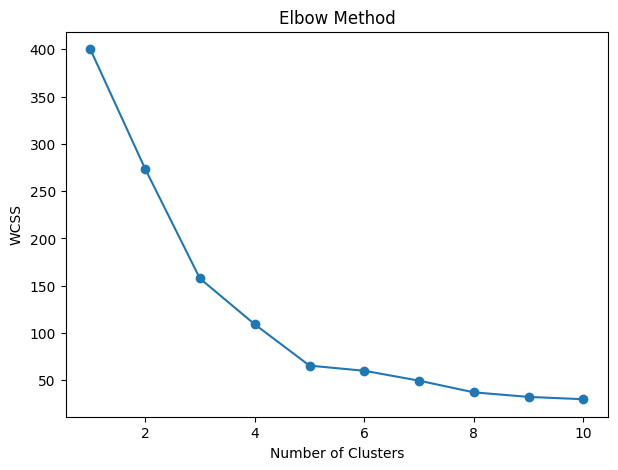

In [13]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker='o')

plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42)

df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


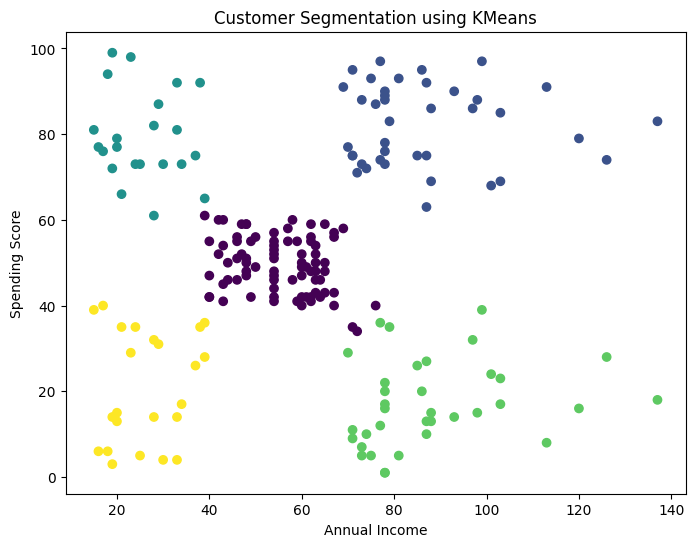

In [15]:
plt.figure(figsize=(8,6))

plt.scatter(df["Annual Income (k$)"],
            df["Spending Score (1-100)"],
            c=df["Cluster"])

plt.title("Customer Segmentation using KMeans")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.show()

In [16]:
cluster_summary = df.groupby("Cluster").agg({
    "Age": "mean",
    "Annual Income (k$)": "mean",
    "Spending Score (1-100)": "mean"
}).round(2)

cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.72,55.30,49.52
1,32.69,86.54,82.13
2,25.27,25.73,79.36
3,41.11,88.20,17.11
4,45.22,26.30,20.91


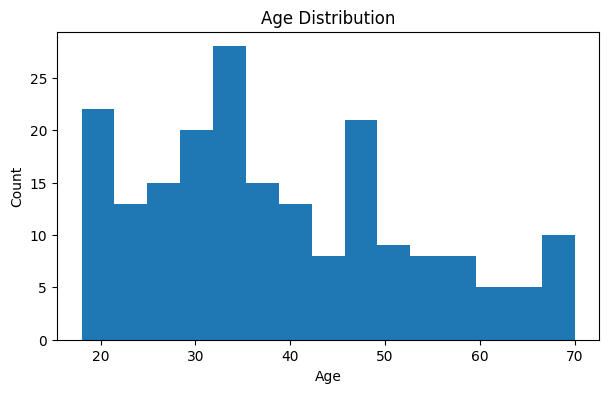

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0,0].hist(df["Age"])
axes[0,0].set_title("Age")

axes[0,1].hist(df["Annual Income (k$)"])
axes[0,1].set_title("Income")

axes[0,2].hist(df["Spending Score (1-100)"])
axes[0,2].set_title("Spending")

axes[1,0].scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
axes[1,0].set_title("Income vs Spending")

axes[1,1].plot(range(1,11), wcss)
axes[1,1].set_title("Elbow")

axes[1,2].scatter(df["Annual Income (k$)"],
                  df["Spending Score (1-100)"],
                  c=df["Cluster"])
axes[1,2].set_title("Clusters")

plt.tight_layout()

plt.savefig("../outputs/plots.png")
plt.show()